<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%B2%95%EA%B3%BC_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

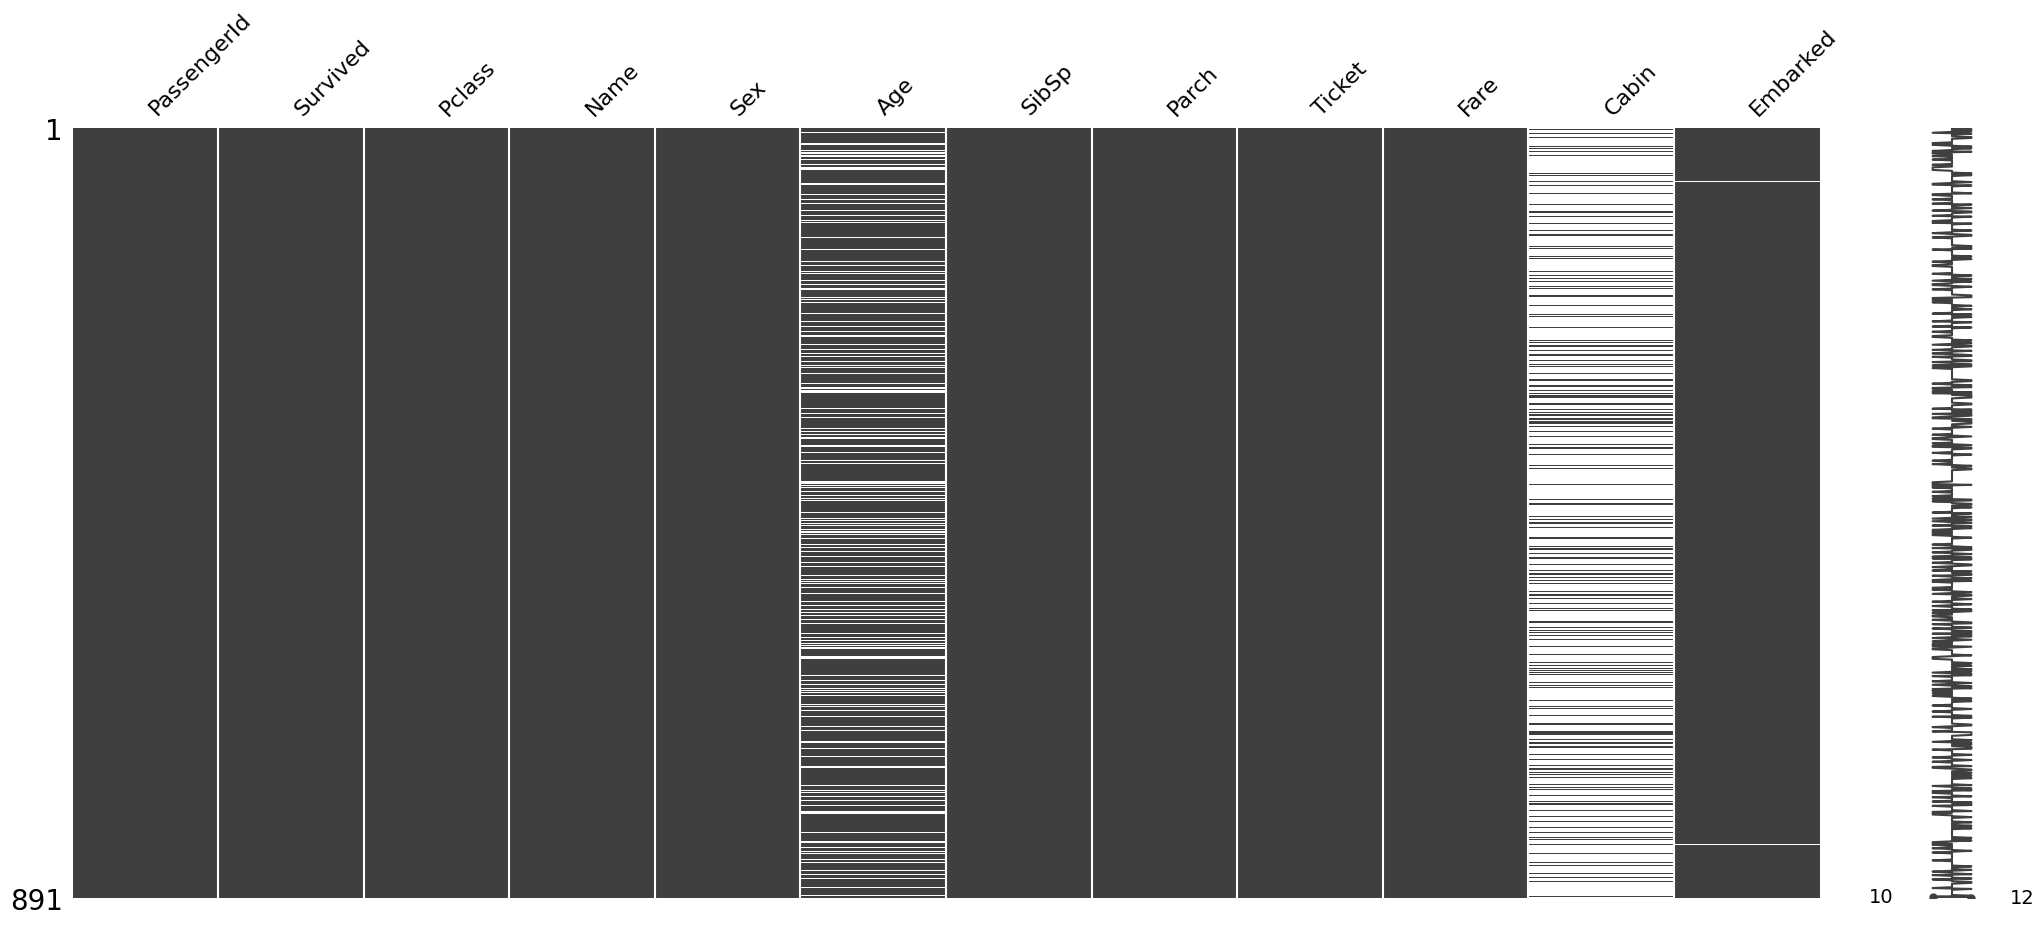

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
# 결측치가 발생했으면
# 1. 시각적
import missingno as msno
msno.matrix(df)

In [ ]:
# 2. 결측치의 row값을 확인 any()
df[df.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

In [ ]:
X.columns
kor_cols = ['날짜', '시간', '일산화탄소농도','co감지센서', '비탄화수소농도',
 '벤젠농도','비메탄탄화수소농도','질소산화물농도','질소산화물응답값', '이산화질소농도',
 '이산화질소응답값', '오존응답값','기온','상대습도','절대습도']
df = X.copy()
df.rename(columns = dict(zip(df.columns, kor_cols)), inplace = True)

In [ ]:
df.head()

,날짜,시간,일산화탄소농도,co감지센서,비탄화수소농도,벤젠농도,비메탄탄화수소농도,질소산화물농도,질소산화물응답값,이산화질소농도,이산화질소응답값,오존응답값,기온,상대습도,절대습도
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
import sys
import matplotlib.pyplot as plt
# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2

Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         9357 non-null   object 
 1   시간         9357 non-null   object 
 2   일산화탄소농도    9357 non-null   float64
 3   co감지센서     9357 non-null   int64  
 4   비탄화수소농도    9357 non-null   int64  
 5   벤젠농도       9357 non-null   float64
 6   비메탄탄화수소농도  9357 non-null   int64  
 7   질소산화물농도    9357 non-null   int64  
 8   질소산화물응답값   9357 non-null   int64  
 9   이산화질소농도    9357 non-null   int64  
 10  이산화질소응답값   9357 non-null   int64  
 11  오존응답값      9357 non-null   int64  
 12  기온         9357 non-null   float64
 13  상대습도       9357 non-null   float64
 14  절대습도       9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
# 일산화 탄소 농도 일부를 결측치로 설정 ( 5 ~ 10)
df.loc[5:11,'일산화탄소농도'] = pd.NA

In [ ]:
df['일산화탄소농도'].iloc[3:15]

,일산화탄소농도
3,2.2
4,1.6
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN
11,NaN
12,0.7


# 결측치
```
데이터누락(NaN, Null)
원인 : 입력실수, 데이터 수집중단, 센서오류
패턴:
  MCAR : 완전 무작위(랜덤)
  MAR : 다른변수와 연관(타이타닉, 나이결측이 성별과관련 )
  MNAR : 결측자체에 의미(설문조사 응답회피)
대처방법
  평균/중앙값/최빈값 -> 결측치가 적고 분포가 단순할때
  상수 대체 : 고정값(0,1, 'unknown) -> 결측치 별도 카테고리로 의미
  그룹별 통계 : 결측치가 그룹패턴과 연관(MAR)
  모델기반
    KNN, 회귀모델
  플래그 추가 : 결측여부를 이진변수로 추가-> astype(int)
  보간법 Interpolation : 결측치를 주변데이터로부터 추정, 연속성 유지에 초점(시계열데이터에 적합)
```

# 보간법의 종류
```
1.선형보간
  두 점사이를 직선으로 채움
  선형패턴(온도변화 등)
2.다항보간
  고차다항식(2차,3차)
  곡선표현 등.. 생물의 성장곡선
3.스플라인보간
  구간별 3차 다항식으로 연결
  공기질 변환
4.최근접이웃보간
  가까운 값으로 채움
  불연속 데이터(이벤트 로그)
5.시간기반보간
  시간 인덱스 기준 선형보간
  센서기록
6.피드/백필보간(Forward/Backfill)
  이전/다음 값으로 채움
  짧은 결측구간
7.Akima보간
  Akima 스플라인으로 보간
  짧은 결측구간
8.Barycentic(바리센틱)보간
  바리센트릭 좌표로 다항보간
  선형과 다항보간의 중간 수준
9.PCHIP(Piecewise Cubic Hermite) 3차보간
  단조성을 유지하는 3차 보간  
  단조성 : 데이터가 항상 증가또는 감소 즉 한방향으로만 변화
```

In [ ]:
interpolated_data = {}

In [ ]:
# 선형보간
df_linear =  df['일산화탄소농도'].interpolate(method = 'linear')
interpolated_data['선형보간'] = df_linear
df_linear.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.4875
2004-03-11 00:00:00,1.3750
2004-03-11 01:00:00,1.2625
2004-03-11 02:00:00,1.1500
2004-03-11 03:00:00,1.0375
2004-03-11 04:00:00,0.9250
2004-03-11 05:00:00,0.8125


In [ ]:
# 다항보간 order 차수지정  f(x) = ax^2 + bx +c
df_poly =  df['일산화탄소농도'].interpolate(method = 'polynomial',order = 2)
interpolated_data['다항보간'] = df_poly
df_poly.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.034506
2004-03-11 00:00:00,0.619242
2004-03-11 01:00:00,0.354208
2004-03-11 02:00:00,0.239404
2004-03-11 03:00:00,0.238424
2004-03-11 04:00:00,0.314864
2004-03-11 05:00:00,0.468722


In [ ]:
# 스플라인 보간
df_spline =  df['일산화탄소농도'].interpolate(method = 'spline',order = 3)
interpolated_data['스플라인보간'] = df_spline
df_spline.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,0.740598
2004-03-11 00:00:00,0.548735
2004-03-11 01:00:00,0.441178
2004-03-11 02:00:00,0.409706
2004-03-11 03:00:00,0.446096
2004-03-11 04:00:00,0.542124
2004-03-11 05:00:00,0.689570


In [ ]:
# 최근접 이웃 보간
df_nearest =  df['일산화탄소농도'].interpolate(method = 'nearest')
interpolated_data['최근접이웃보간'] = df_nearest
df_nearest.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.6
2004-03-11 00:00:00,1.6
2004-03-11 01:00:00,1.6
2004-03-11 02:00:00,1.6
2004-03-11 03:00:00,0.7
2004-03-11 04:00:00,0.7
2004-03-11 05:00:00,0.7


In [ ]:
# 시간 기반 보정
# 날자와 시간을 결합해서 시간인덱스 생성
df['DateTime'] = pd.to_datetime(df['날짜'] + ' ' + df['시간'], format = "%m/%d/%Y %H:%M:%S" )
df.set_index('DateTime', inplace = True)
df_time =  df['일산화탄소농도'].interpolate(method = 'time')
interpolated_data['시간기반보간'] = df_time
df_time.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.4875
2004-03-11 00:00:00,1.3750
2004-03-11 01:00:00,1.2625
2004-03-11 02:00:00,1.1500
2004-03-11 03:00:00,1.0375
2004-03-11 04:00:00,0.9250
2004-03-11 05:00:00,0.8125


In [ ]:
#패드/백필 보간(forwardfill / backfill)
df_ffill =  df['일산화탄소농도'].fillna(method = 'ffill')
interpolated_data['포필보간'] = df_ffill
df_bfill = df['일산화탄소농도'].fillna(method = 'bfill')
interpolated_data['백필보간'] = df_bfill
print(df_ffill.iloc[5:12])
print(df_bfill.iloc[5:12])

DateTime
2004-03-10 23:00:00    1.6
2004-03-11 00:00:00    1.6
2004-03-11 01:00:00    1.6
2004-03-11 02:00:00    1.6
2004-03-11 03:00:00    1.6
2004-03-11 04:00:00    1.6
2004-03-11 05:00:00    1.6
Name: 일산화탄소농도, dtype: float64
DateTime
2004-03-10 23:00:00    0.7
2004-03-11 00:00:00    0.7
2004-03-11 01:00:00    0.7
2004-03-11 02:00:00    0.7
2004-03-11 03:00:00    0.7
2004-03-11 04:00:00    0.7
2004-03-11 05:00:00    0.7
Name: 일산화탄소농도, dtype: float64


<ipython-input-107-7d21f73b9ba9>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill =  df['일산화탄소농도'].fillna(method = 'ffill')
<ipython-input-107-7d21f73b9ba9>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df['일산화탄소농도'].fillna(method = 'bfill')


In [ ]:
# Akima 보간  아키마 스플라인을 사용
# 각 데이터의 포인트의 기울기 Gradient 를 계산..  미분
# 기본 5개의 점을사용해서 보간을수행 급격한 변화가 있는 구간에서는 과도한 곡률이 생기지 않도록 조정
# 최종적으로는 3차 다항식
# 계산량이 많고 이상치에 강함
df_akima = df['일산화탄소농도'].interpolate(method = 'akima')
interpolated_data['아키마보간'] = df_akima
df_akima.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.287884
2004-03-11 00:00:00,1.027472
2004-03-11 01:00:00,0.821427
2004-03-11 02:00:00,0.672415
2004-03-11 03:00:00,0.583101
2004-03-11 04:00:00,0.556151
2004-03-11 05:00:00,0.594229


In [ ]:
# # 바리센틱 보간
# df_barycentric = df['일산화탄소농도'].interpolate(method = 'barycentric')
# df_barycentric.iloc[5:12]

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Interpolation points xi must be distinct.

In [ ]:
# PCHIP
# 스플라인과 비슷한데 단조성을 유지한다.
# 스플라인보간 + 기울기(미분값)도 주어진 값으로 사용 보다 부드러운 곡선
# 이상치에 강함
df_pchip = df['일산화탄소농도'].interpolate(method = 'pchip')
interpolated_data['pchip'] = df_pchip
df_pchip.iloc[5:12]

,일산화탄소농도
DateTime,
2004-03-10 23:00:00,1.384980
2004-03-11 00:00:00,1.200252
2004-03-11 01:00:00,1.045314
2004-03-11 02:00:00,0.919668
2004-03-11 03:00:00,0.822814
2004-03-11 04:00:00,0.754251
2004-03-11 05:00:00,0.713479


# 각 보간법에 따른 시각화

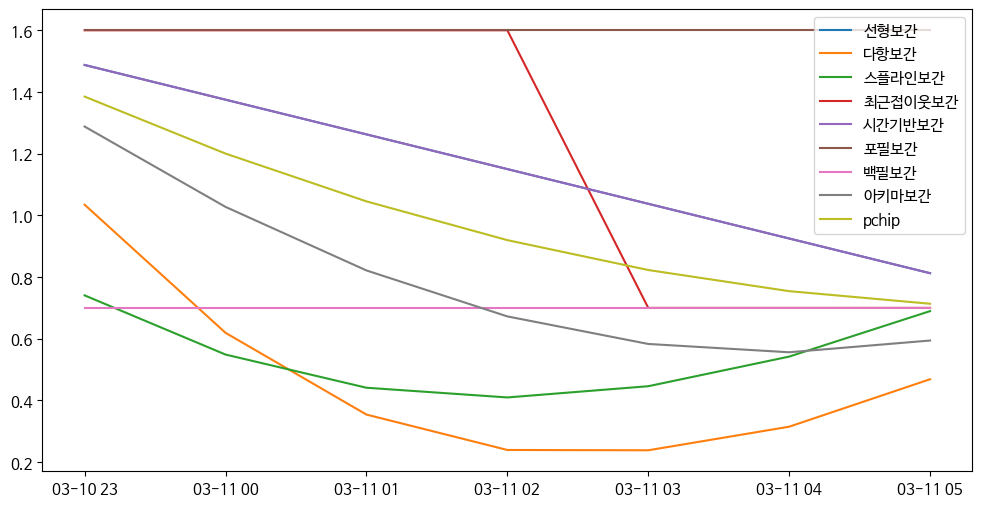

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
# plt.plot(X.iloc[5:12 , 2],label='원본', marker='o')
for name, data in interpolated_data.items():
  plt.plot(data.iloc[5:12], label=name)
plt.legend()
plt.show()

# air quality 에서 -200을 na로 셋팅

<Axes: xlabel='DateTime', ylabel='일산화탄소농도'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


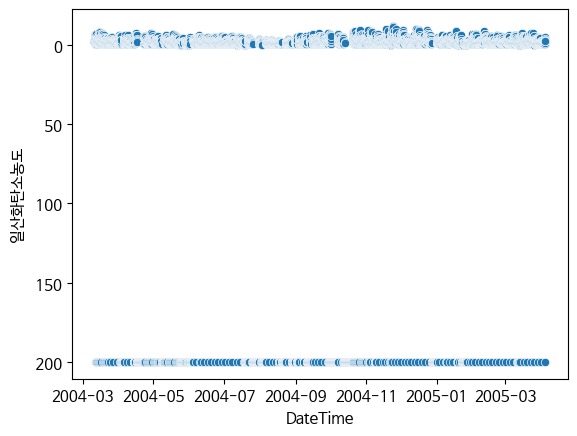

In [ ]:
X.columns
kor_cols = ['날짜', '시간', '일산화탄소농도','co감지센서', '비탄화수소농도',
 '벤젠농도','비메탄탄화수소농도','질소산화물농도','질소산화물응답값', '이산화질소농도',
 '이산화질소응답값', '오존응답값','기온','상대습도','절대습도']
X.rename(columns = dict(zip(df.columns, kor_cols)), inplace = True)

In [ ]:
df = X.copy()
for col in df.columns:
  df[col] = df[col].replace(-200, pd.NA)

<Axes: >

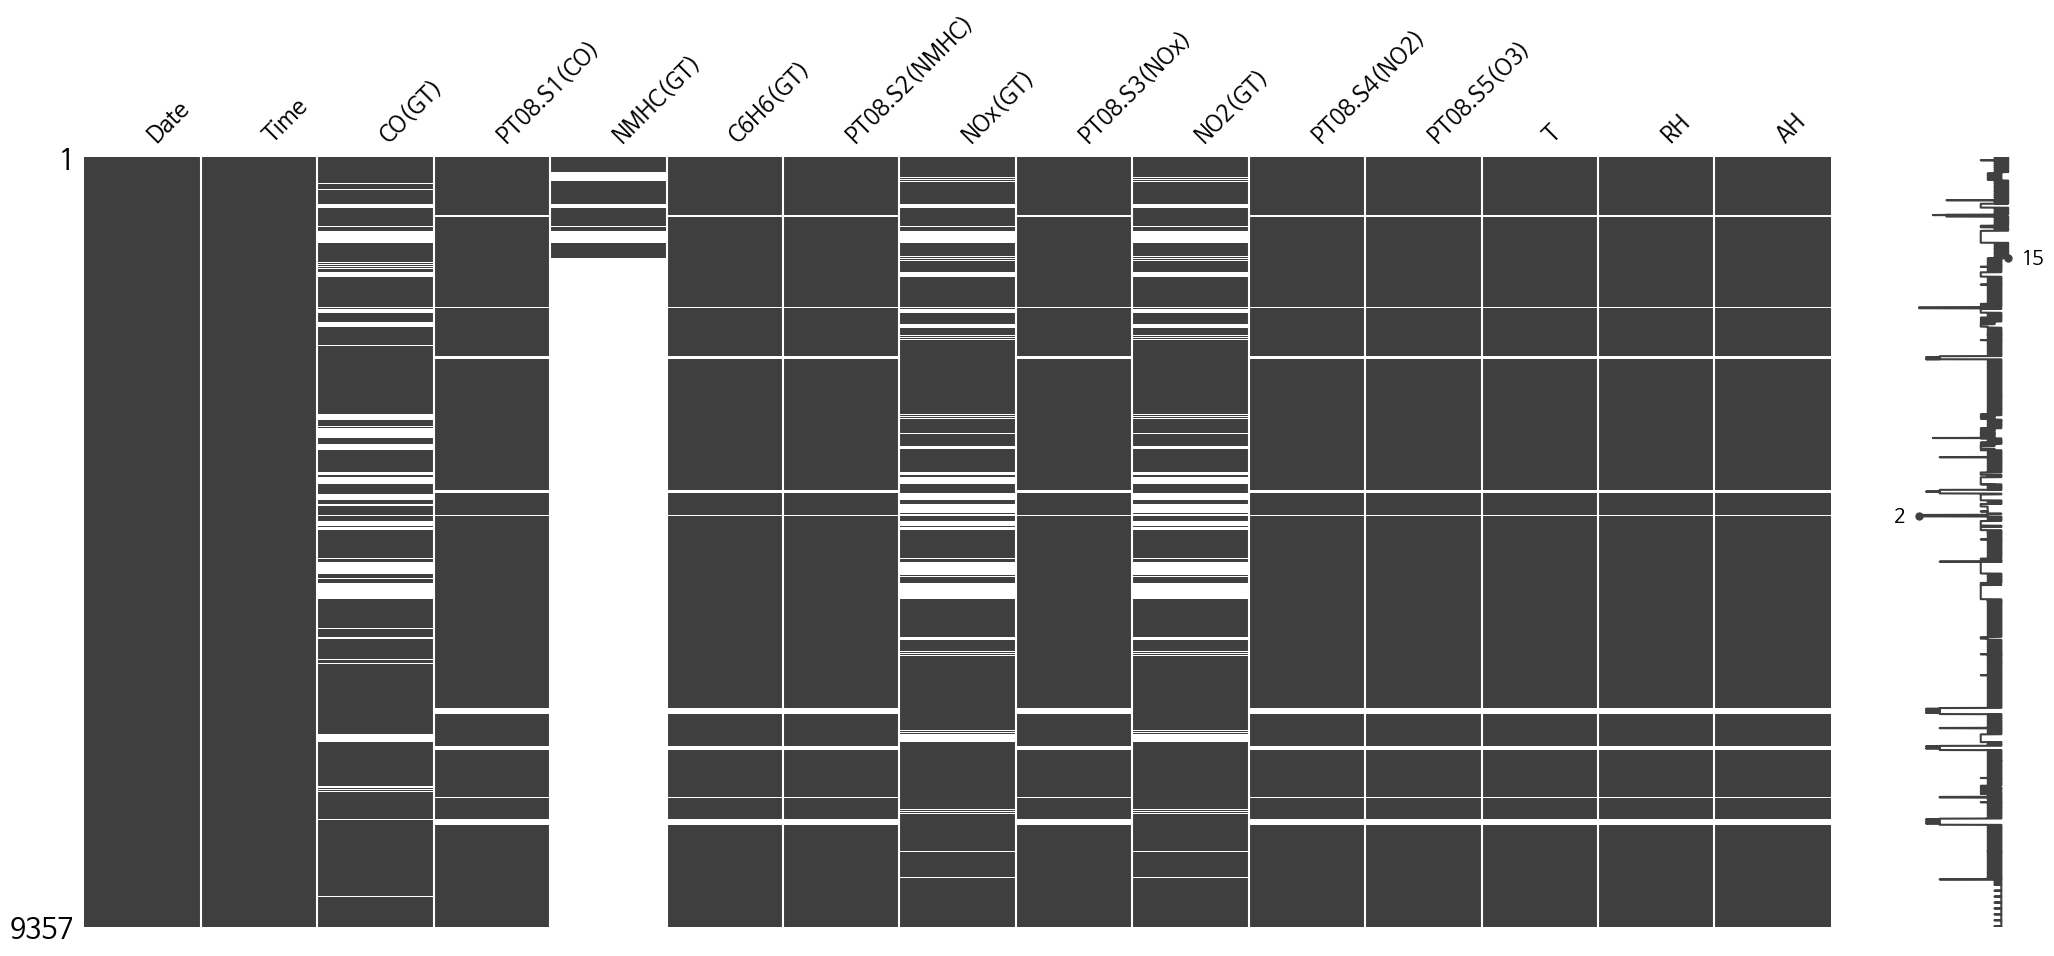

In [ ]:
msno.matrix(df)

In [ ]:
from tqdm import tqdm
import numpy as np

df = X.copy()
for col in df.columns:
  df[col] = df[col].replace(-200, np.nan)

interpolated_data = {}
interpolated_name = [ 'linear',  'polynomial' ,'spline', 'nearest' ,'time', 'akima','pchip' ]
# time 때문에.. 데이터를 시간기준으로 인덱스 생성
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = "%m/%d/%Y %H:%M:%S" )
df.set_index('DateTime', inplace = True)

# 구간 설정
temp = df['CO(GT)'].loc['2004-04-01 00:00:00' : '2004-05-01 00:00:00']
for name in tqdm(interpolated_name):
  if name == 'polynomial':
    interpolated_data[name] =  temp.interpolate(method = name,order = 2)
  elif name =='spline':
    interpolated_data[name] =  temp.interpolate(method = name,order = 3)
  else:
    interpolated_data[name] =  temp.interpolate(method = name)

interpolated_data['original'] = temp.copy()
# interpolated_data['original'] = interpolated_data['original'].fillna(0)

100%|██████████| 7/7 [00:00<00:00, 735.18it/s]


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


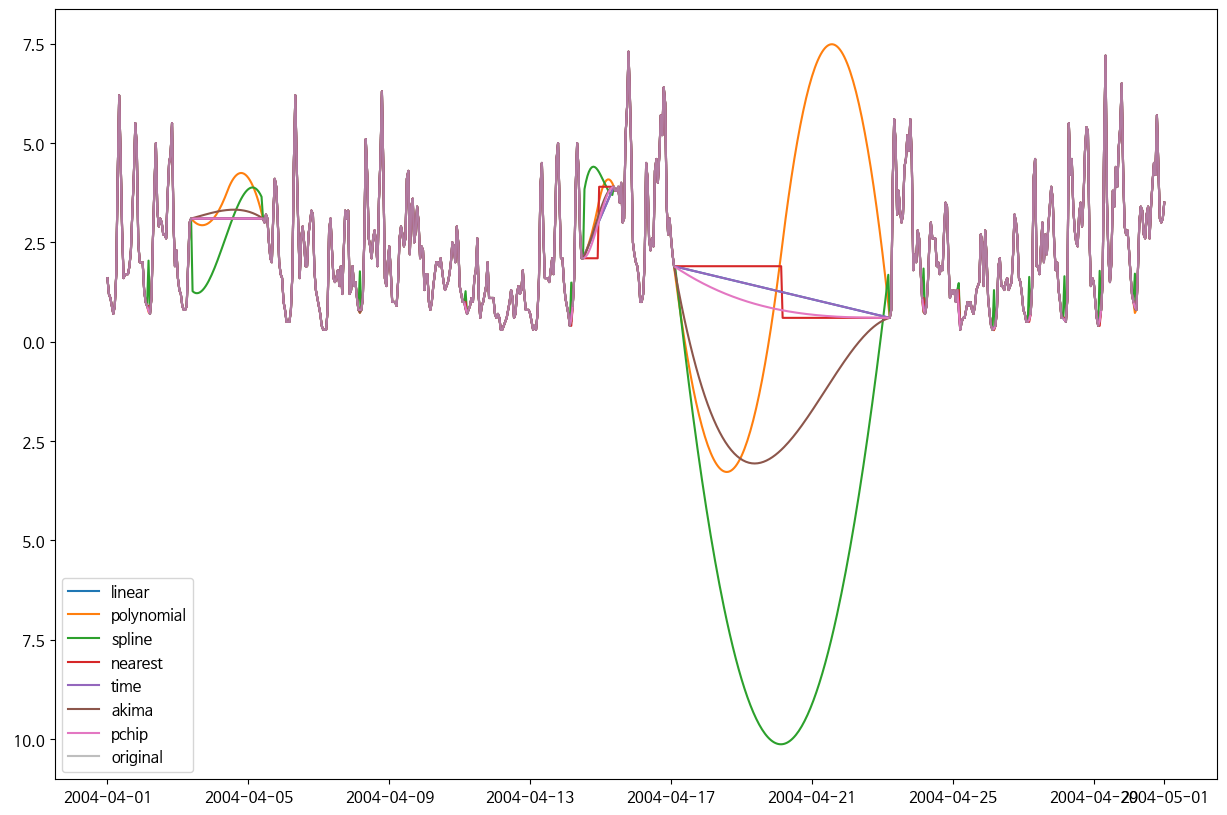

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for method, data in interpolated_data.items():
  if method == 'original':
    plt.plot(data, label=method, alpha = 0.5)
  else:
    plt.plot(data, label=method, linewidth=1.5)
plt.legend()

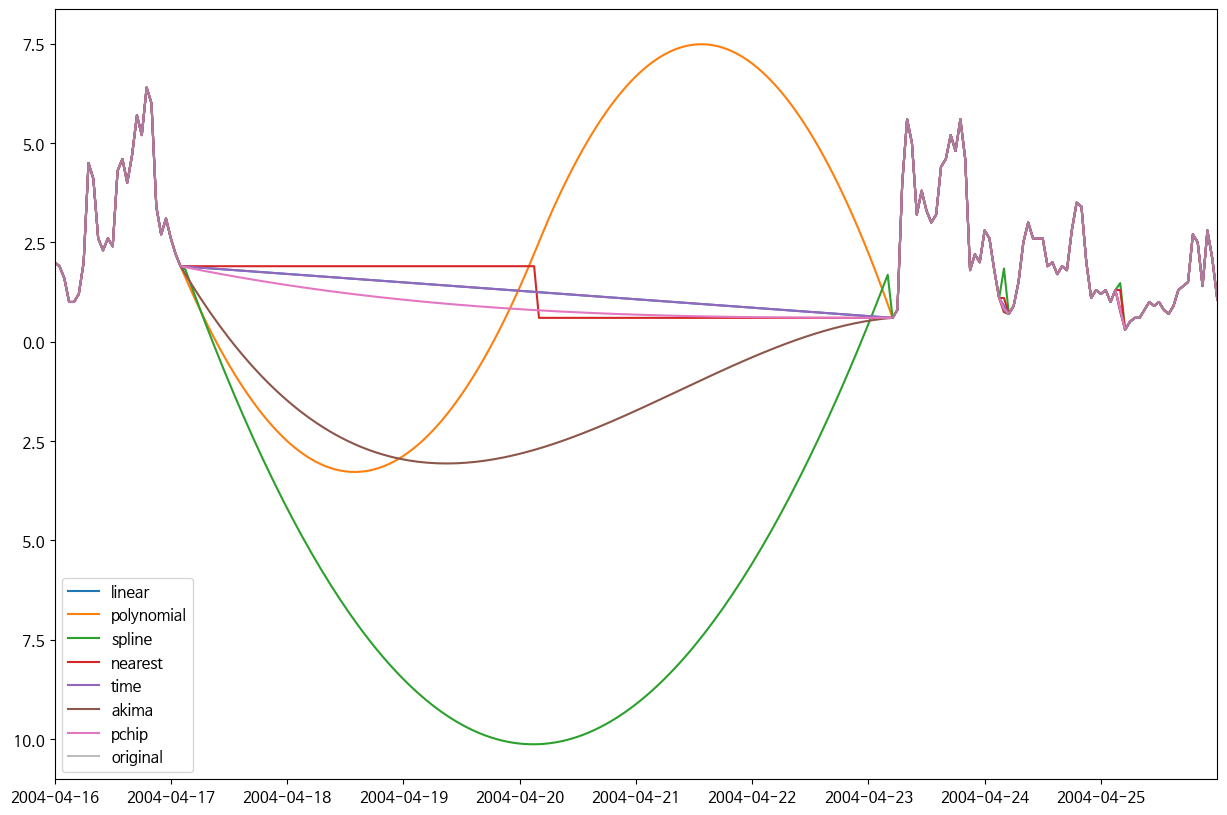

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for method, data in interpolated_data.items():
  if method == 'original':
    plt.plot(data, label=method, alpha = 0.5)
  else:
    plt.plot(data, label=method, linewidth=1.5)
s_date = pd.to_datetime('2004-04-16 00:00:00')
e_date = pd.to_datetime('2004-04-25 23:59:59')
plt.xlim(s_date,e_date)
plt.legend()

# 연습데이터

<Axes: >

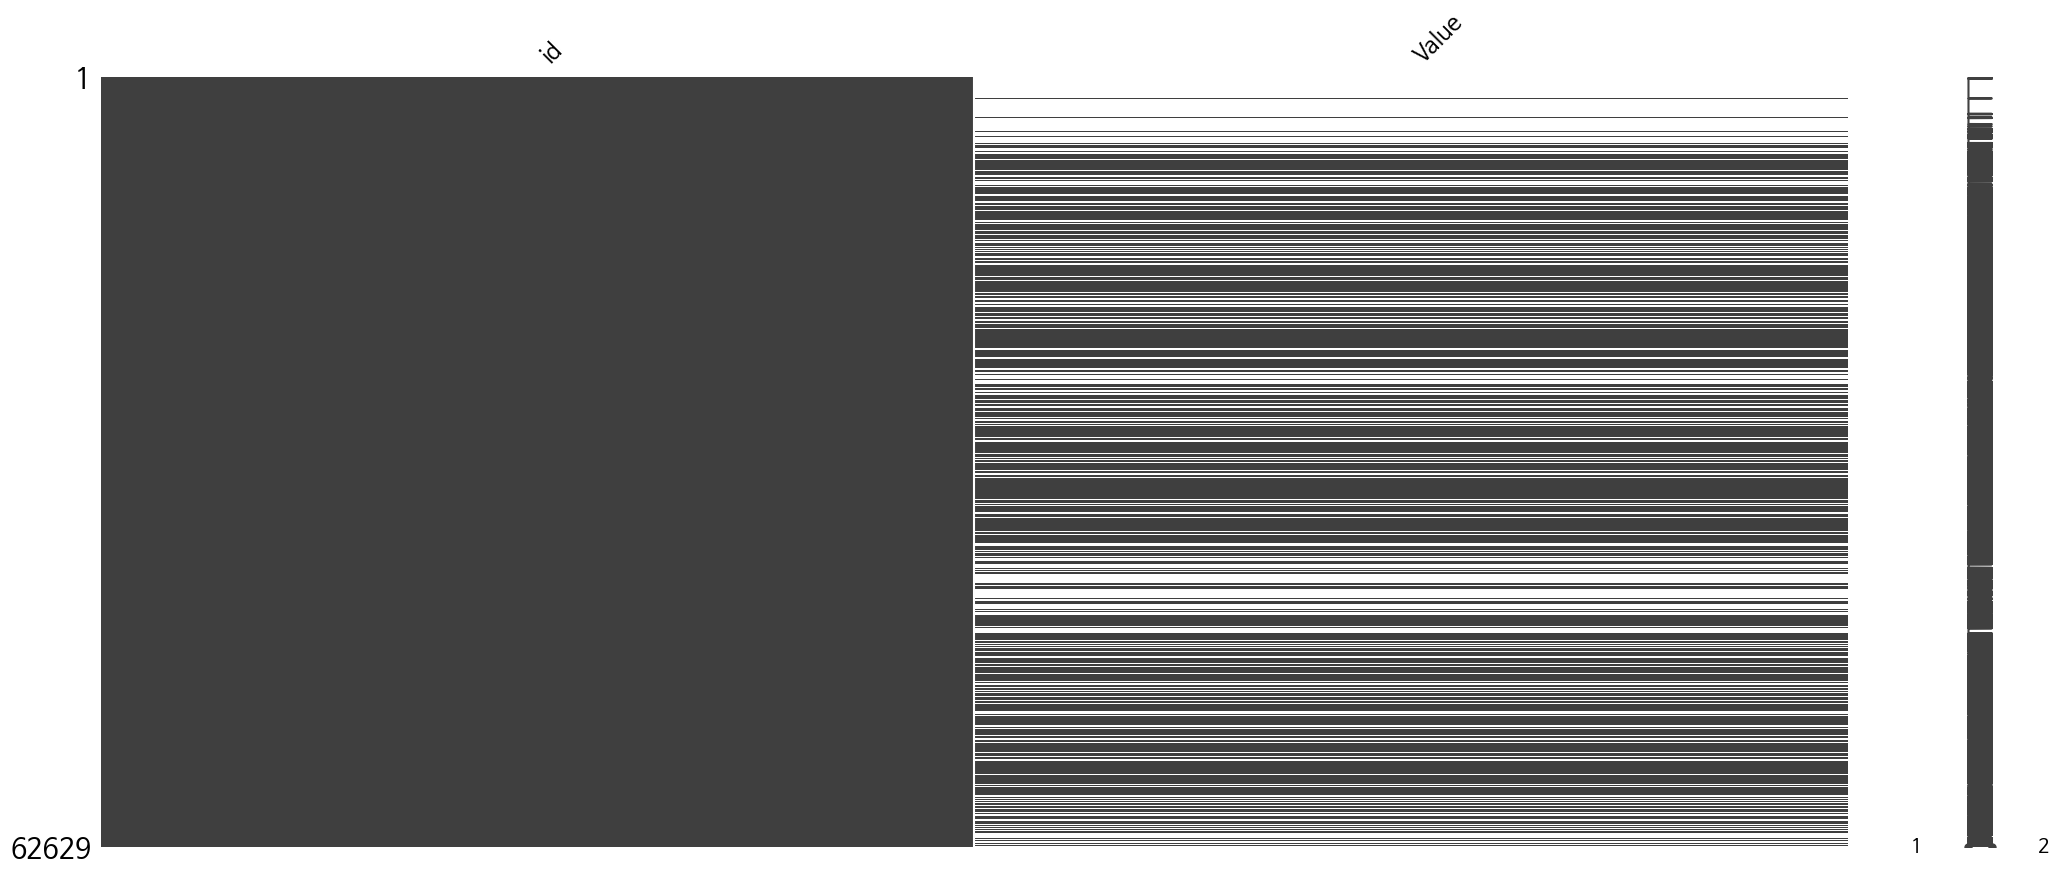

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
url = 'https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/interpolation_sample.csv'
df = pd.read_csv(url)

msno.matrix(df)

In [ ]:
# 다양한 방법으로 결측치를 채우고.. 시각화를 통해 비교
interpolated_name = [ 'linear',  'polynomial' ,'spline', 'nearest' ,'akima','pchip','time' ]
interpolated_data = {}

# 시간인덱스 추가
df['time'] = pd.date_range(start = '2000-01-01 00:00:00',periods=len(df),freq='H')
df.set_index('time', inplace = True)

for name in interpolated_name:
  if name == 'polynomial':
    interpolated_data[name] =  df['Value'].interpolate(method = name, order=2)
  elif name == 'spline':
    interpolated_data[name] =  df['Value'].interpolate(method = name, order=3)
  else:
    interpolated_data[name] =  df['Value'].interpolate(method = name)

interpolated_data['original'] = df['Value'].copy()


<ipython-input-200-92d3f1957ec2>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time'] = pd.date_range(start = '2000-01-01 00:00:00',periods=len(df),freq='H')


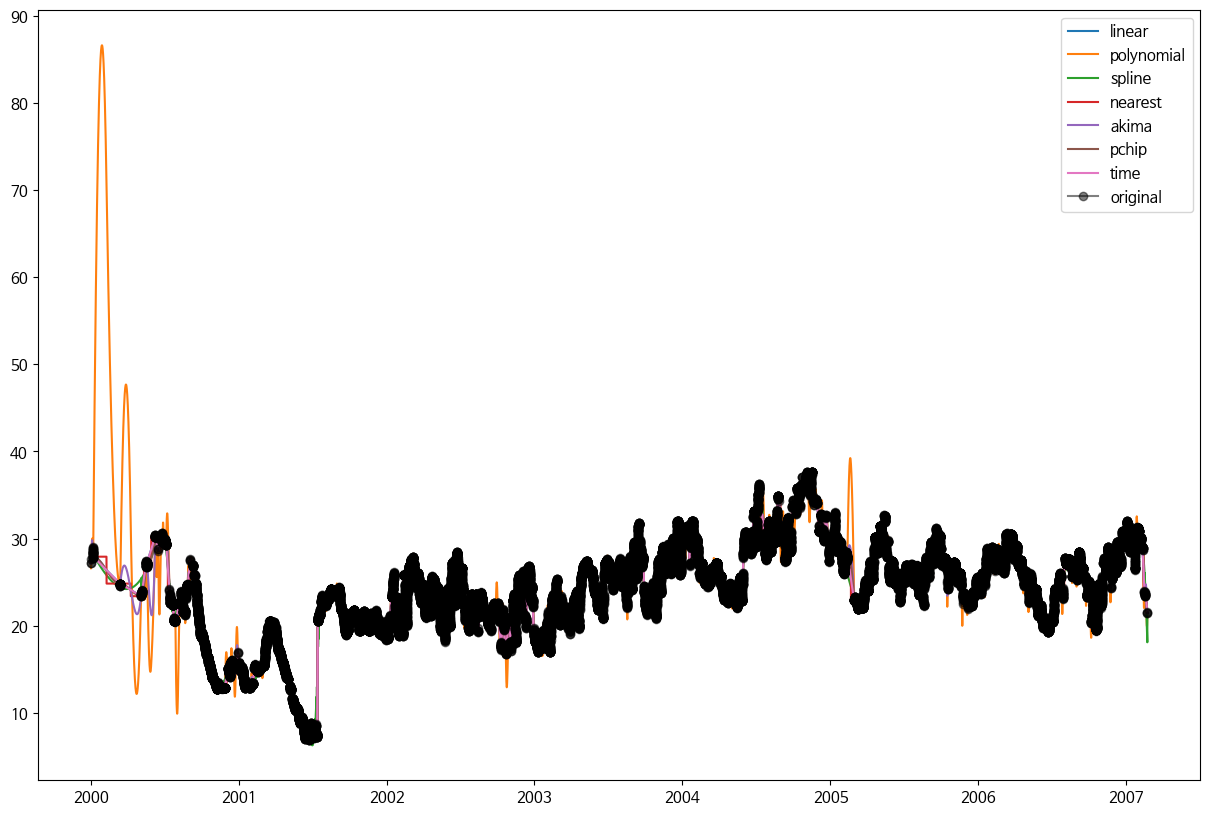

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for method, data in interpolated_data.items():
  if method == 'original':
    plt.plot(data, label=method, alpha = 0.5, color = 'black',marker='o')
  else:
    plt.plot(data, label=method, linewidth=1.5)
# plt.xlim(0,10000)
plt.legend()
plt.show()

In [ ]:
df2 = df.copy()
df2['time'] = pd.date_range(start = '2000-01-01 00:00:00',periods=len(df),freq='H')
df2.set_index('time', inplace = True)
df2['Value'].interpolate(method = 'time')

<ipython-input-198-9662e64c6601>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2['time'] = pd.date_range(start = '2000-01-01 00:00:00',periods=len(df),freq='H')


,Value
time,
2000-01-01 00:00:00,27.636770
2000-01-01 01:00:00,27.250818
2000-01-01 02:00:00,27.154348
2000-01-01 03:00:00,27.165513
2000-01-01 04:00:00,27.176678
...,...
2007-02-22 08:00:00,21.505711
2007-02-22 09:00:00,21.485741
2007-02-22 10:00:00,21.465771


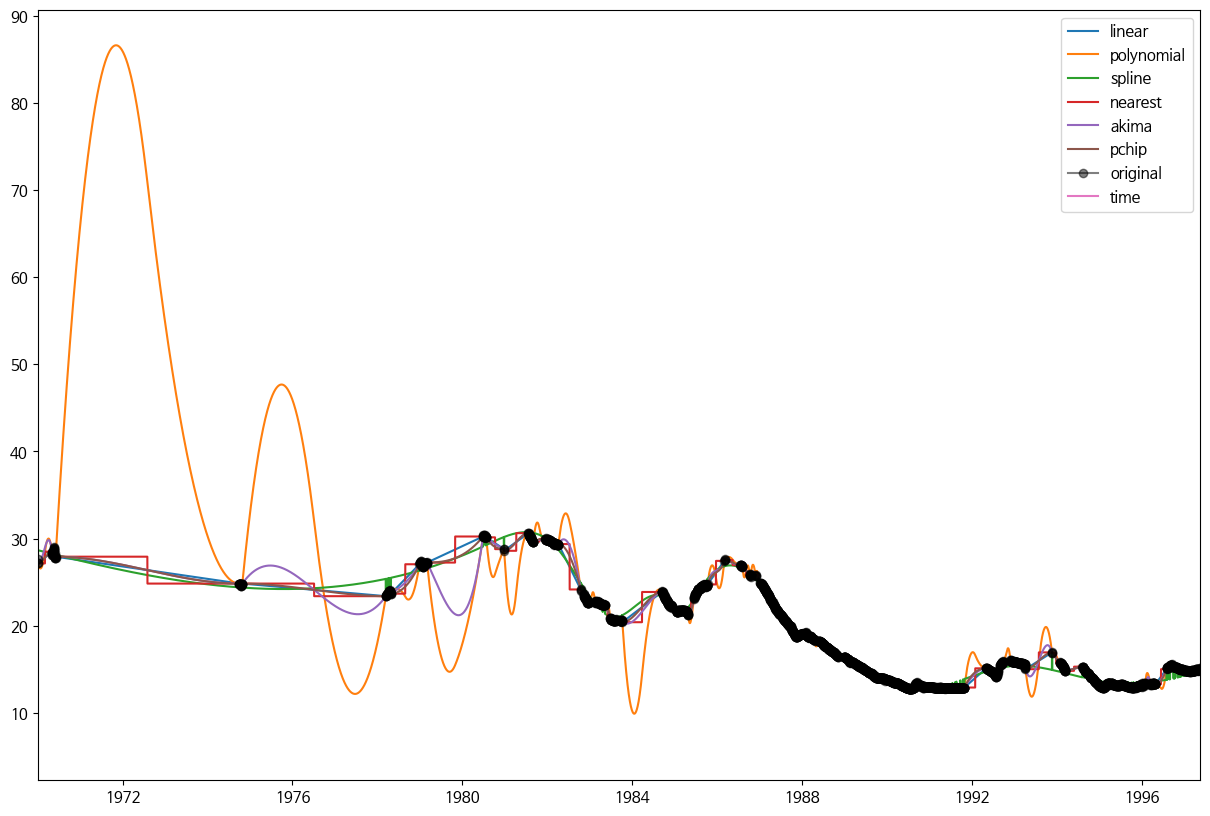

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for method, data in interpolated_data.items():
  if method == 'original':
    plt.plot(data, label=method, alpha = 0.5, color = 'black',marker='o')
  else:
    plt.plot(data, label=method, linewidth=1.5)

plt.plot(df2['Value'], label='time', linewidth=1.5)

plt.xlim(0,10000)
plt.legend()
plt.show()

# 클래스 불균형
```
  샘플수가 다를때
  현실 : 공기의 질이 좋은 날이 더 많다
  데이터수집 : 특정 조건에서만 데이터를 수집하는 오류
  모델은  '좋음' 만 잘 예측하고 '나쁨'을 놓칠수 있다

  해결:
    데이터 수준과 알고리즘 수준으로 나뉜다
    데이터 전처리단계에서 적용
    - 데이터 수준(전처리 단계)  - 학습전에 데이터를 가공
      - 랜덤오버샘플링
        - 소수 클래스데이터를 랜덤하게 중복 생성(단순카피)
      - 랜덤 언더샘플링
        - 다수 클래스의 데이터를 줄임
      - SMOTE
        - 소수의데이터를 보고 비슷한 새 데이터를 만들어서 늘린다
        - ex co농도가 5 와 7인 데이터 중간값인 6을 만들어서 추가
        - 소수의 데이터사이를 보간해서 합성데이터 생성
        - 장점 : 적은데이터의 특성을 잘 반영
        - 단점 : 너무 비슷한 데이터가 맣아지고,과적합 위험
          - 과적합(학습한 데이터는 성능이 높지만 그렇지 않은 데이터는 성능이 저조한 현상)

    - 알고리즘 수준 - 모델 학습 단계    
      - 클래스 가중치 조정 : 소수클래스에 높은 가중치 적용
        - 모델의 라이브러리의 매개변수로 존재
          - 모델한테.. 누가 더 중요한지 모델에 알려줌(x0.05)
      - Balanced Random Forest : 클래스 균형을 맞춘 앙상블
         - BRF : 여러개의 Tree 모델을 학습해서 최종 예측값을 다수결 방식으로 결정하는 모델    

```

<Axes: >

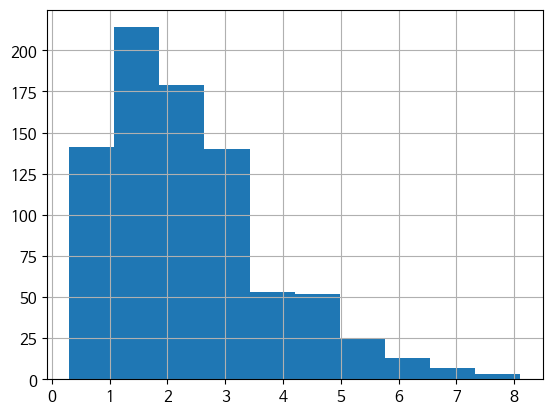

In [ ]:
df = X.copy()
# -200은 제거  모든 컬럼의 -200을 np.nan 변경한다음. dropna() 제거
df = df.replace(-200, np.nan).dropna()
# CO(GT) 좋음 : 0, 나쁨(농도가 높다) : 1   y 변수에 저장
df['CO(GT)'].hist()

In [ ]:
# 좋음 : 0, 나쁨 : 1
y =  (df['CO(GT)'] >= 4).astype(int)

In [ ]:
df.shape, y.shape

((827, 15), (827,))

In [ ]:
# 데이터를 섞는다.
from sklearn.model_selection import train_test_split
# df : 학습용 데이터... x
# y : 정답,타겟,클래스 : y
# train ,test
# 섞는데. 랜덤하게 섞는다.. random_state는 seed 값을 정의
# seed
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((661, 15), (661,))

CO(GT)
0    571
1     90
Name: count, dtype: int64


<Axes: xlabel='CO(GT)'>

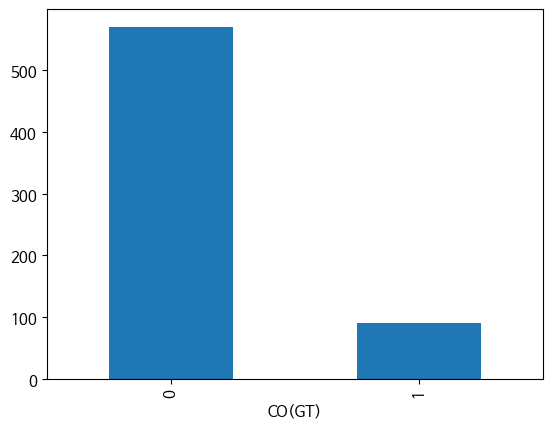

In [ ]:
# 클래스 불균형 확인
print(y_train.value_counts())
import seaborn as sns
y_train.value_counts().plot(kind='bar')

In [ ]:
# 랜덤오버샘플링
from imblearn.over_sampling import RandomOverSampler
model_base =  RandomOverSampler(random_state=42)
x_train_over, y_train_over =  model_base.fit_resample(X_train, y_train)
print(f'오버샘플링 전 : {y_train.value_counts()}')
print(f'오버샘플링 후 : {y_train_over.value_counts()}')
print(f'중복데이터 : {x_train_over.duplicated().sum()}')

오버샘플링 전 : CO(GT)
0    571
1     90
Name: count, dtype: int64
오버샘플링 후 : CO(GT)
0    571
1    571
Name: count, dtype: int64
중복데이터 : 481


In [ ]:
x_train_over[y_train_over == 1].duplicated().sum()

np.int64(481)

In [ ]:
# 랜덤언더샘플링
from imblearn.under_sampling import RandomUnderSampler
model_base =  RandomUnderSampler(random_state=42)
x_train_under, y_train_under =  model_base.fit_resample(X_train, y_train)
print(f'언더샘플링 전 : {y_train.value_counts()}')
print(f'언더샘플링 후 : {y_train_under.value_counts()}')

언더샘플링 전 : CO(GT)
0    571
1     90
Name: count, dtype: int64
언더샘플링 후 : CO(GT)
0    90
1    90
Name: count, dtype: int64


In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
droped_x_train =  X_train.drop(['Date','Time'], axis = 1)
x_train_smote, y_train_smote =  smote.fit_resample(droped_x_train, y_train)

print(f'SMOTE 전 : {y_train.value_counts()}')
print(f'SMOTE 후 : {y_train_smote.value_counts()}')
print(f'중복데이터 : {x_train_smote.duplicated().sum()}')

SMOTE 전 : CO(GT)
0    571
1     90
Name: count, dtype: int64
SMOTE 후 : CO(GT)
0    571
1    571
Name: count, dtype: int64
중복데이터 : 0


```
다양한 환경의 데이터에서 결측치를 채우고 평가
결측치가 없는데이터에서 임의로 np.nan으로 대체한다음
정답데이터 VS 결측치를 채운 데이터
sum((각요소 - 평균)^2 ) = 평균제곱오차  MSE
```

In [ ]:
# 데이터 수집
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

<Axes: >

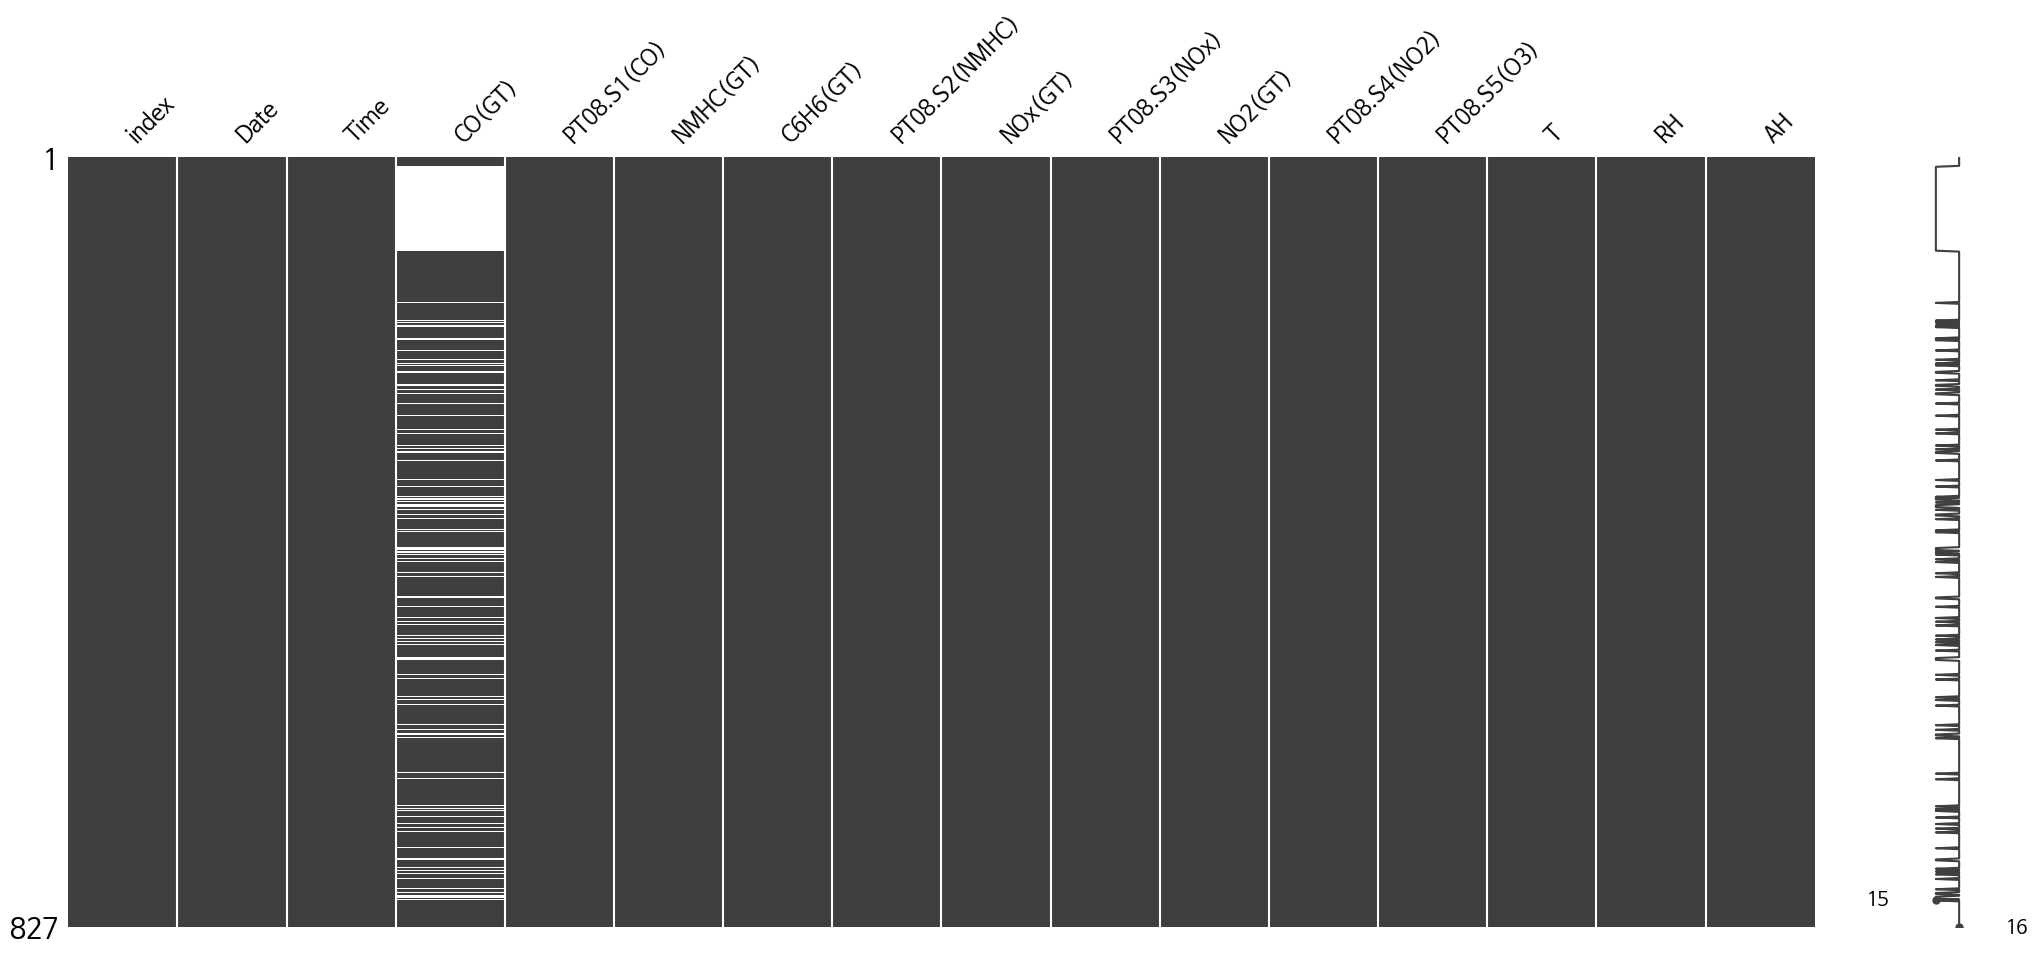

In [ ]:
import numpy as np
import random
import missingno as msno
random.seed(42)

nan_sample = X.replace(-200, np.nan)  # -200 데이터를 찾아서 nan replace
nan_sample.dropna(inplace = True)  # 결측치 제거
# CO(GT) 컬럼에 임이의 위치의 데이터를 np.nan으로 대처
nan_sample.reset_index(inplace=True)  # 인덱스 재 정렬(필수는 아님)

# 10 ~ 100 연속구간에서
# 150 ~ 800 구간에서 랜던하게 100개
original_data = nan_sample.copy()
nan_index = list(random.sample(range(150,801),100) + list(range(10,101)) )
nan_sample.loc[nan_index , 'CO(GT)'] = np.nan
msno.matrix(nan_sample)

In [ ]:
interpolated_data = {}
# print(nan_index)
#  선형 보간
df_linear =  nan_sample['CO(GT)'].interpolate(method = 'linear')
interpolated_data['선형보간'] = df_linear

# 평균제곱오차
from sklearn.metrics import mean_squared_error
# 정답
real = original_data.loc[nan_index, 'CO(GT)'].to_numpy()
# 보간
predict = interpolated_data['선형보간'][nan_index].to_numpy()
# 평균제곱오차
from sklearn.metrics import mean_squared_error
mean_squared_error(real,predict)  # 2.1478250436300175

2.1478250436300175

# 공공데이터 CSV 분양관련 데이터를 받아서. 지역별 분양가 출력

In [ ]:
import pandas as pd
file_path = '/content/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [ ]:
# 1. 2015년 기준 지역별 분양가격
# 1. 연도별 지역별 분양가격
# 1. 연도별 지역별 규모구분별 분양가격
# 분양가 추이를 확인   2015년도 기준으로 서울에서 월별 분양가격
# 이 데이터는 몇년부터 ~ 몇년가지인지 년도에 대한 unique 값

In [ ]:
import numpy as np
df2 = df.copy()
df2.dropna(inplace=True)
print( (df2['분양가격(제곱미터)'] == '  ').sum() )
df2['분양가격(제곱미터)'].replace('  ',np.nan, inplace = True)
df2['분양가격(제곱미터)'].replace(' ',np.nan, inplace = True)
df2.dropna(inplace=True)
df2['분양가격(제곱미터)'] = df2['분양가격(제곱미터)'].astype(int)
df2.info()


31
<class 'pandas.core.frame.DataFrame'>
Index: 8355 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         8355 non-null   object
 1   규모구분        8355 non-null   object
 2   연도          8355 non-null   int64 
 3   월           8355 non-null   int64 
 4   분양가격(제곱미터)  8355 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 391.6+ KB


<ipython-input-328-83ddbe38059e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['분양가격(제곱미터)'].replace('  ',np.nan, inplace = True)
<ipython-input-328-83ddbe38059e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 